In [41]:
import pandas as pd

In [43]:
df = pd.read_csv('/Users/thispc/Desktop/Machine-learning/pandas/kaggle-dataset/HousingData.csv')

In [72]:
df.dropna(inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [73]:
X = df.drop(columns='MEDV')

In [74]:
y = df['MEDV']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80)

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
R = Ridge()
sc = cross_val_score(R, X_train, y_train, scoring='r2', cv=5, n_jobs=-1,error_score='raise')

In [81]:
sc

array([0.74104151, 0.77366345, 0.70780815, 0.79584815, 0.76118053])

In [82]:
 para = {
     'alpha' : [0.0001,0.0005,0.0010]
 }

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
GS = GridSearchCV(estimator=R,param_grid=para, verbose=5,n_jobs=-1,scoring= 'r2',cv=5)

In [85]:
GS

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001]}, scoring='r2',
             verbose=5)

In [89]:
GS.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001]}, scoring='r2',
             verbose=5)

In [90]:
GS.best_params_

{'alpha': 0.001}

In [92]:
model = Ridge(alpha= 0.001)

In [93]:
model.fit(X_train,y_train)

Ridge(alpha=0.001)

[CV 1/5] END ......................alpha=0.0001;, score=0.749 total time=   0.0s
[CV 2/5] END ......................alpha=0.0001;, score=0.778 total time=   0.0s
[CV 3/5] END ......................alpha=0.0001;, score=0.710 total time=   0.0s
[CV 4/5] END ......................alpha=0.0001;, score=0.803 total time=   0.0s
[CV 5/5] END ......................alpha=0.0001;, score=0.743 total time=   0.0s
[CV 1/5] END ......................alpha=0.0005;, score=0.749 total time=   0.0s
[CV 2/5] END ......................alpha=0.0005;, score=0.778 total time=   0.0s
[CV 3/5] END ......................alpha=0.0005;, score=0.710 total time=   0.0s
[CV 4/5] END ......................alpha=0.0005;, score=0.803 total time=   0.0s
[CV 5/5] END ......................alpha=0.0005;, score=0.743 total time=   0.0s
[CV 1/5] END .......................alpha=0.001;, score=0.749 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;, score=0.778 total time=   0.0s
[CV 3/5] END ...............

In [80]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [96]:
y_pred = model.predict(X_test)

In [94]:
from sklearn.metrics import r2_score

In [98]:
r2_score(y_test,y_pred) # with grid search

0.6955425836309342

In [99]:
# lasso



In [101]:
ls = Lasso(alpha=0.001)     # same alpha will come 0.001

In [103]:
model = ls.fit(X_train,y_train)

In [104]:
y_pred = model.predict(X_test)

In [105]:
r2_score(y_test,y_pred)

0.6951841110604646

In [106]:
# FEATURE SELECTION

In [107]:
# COEFICIENT

In [108]:
model.coef_

array([-8.57519137e-02,  4.94072026e-02,  3.87560524e-02,  3.23511535e+00,
       -1.45290105e+01,  3.77541324e+00, -2.42603782e-03, -1.31325272e+00,
        2.82328383e-01, -1.49527110e-02, -9.07645210e-01,  7.56485880e-03,
       -5.06257208e-01])

In [109]:
from matplotlib import pyplot as plt

<BarContainer object of 13 artists>

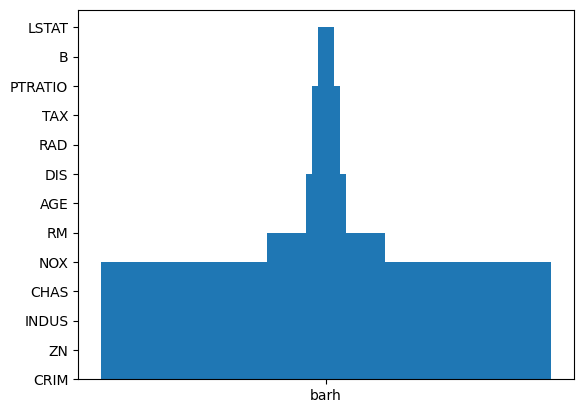

In [122]:
plt.bar('barh',X_train.columns,model.coef_)

In [124]:
pls = pd.Series(model.coef_,index=X_train.columns)

<Axes: >

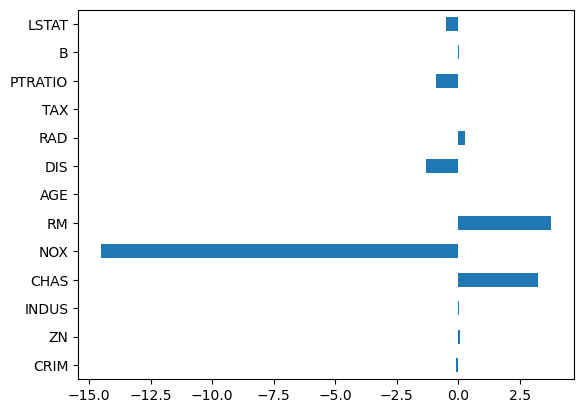

In [128]:
pls.plot(kind='barh')

<Axes: >

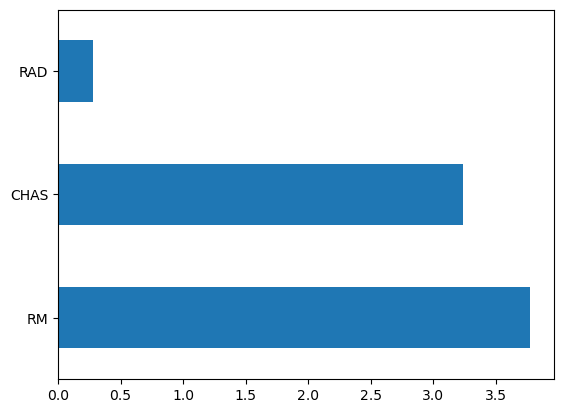

In [126]:
pls.nlargest(3).plot(kind='barh')      # feature selection also

In [129]:
#additionally you can use this library for leature selection

In [130]:
from sklearn.tree import ExtraTreeRegressor

In [131]:
ls

Lasso(alpha=0.001)

In [132]:
model = ExtraTreeRegressor()

In [133]:
model.fit(X_train,y_train)

ExtraTreeRegressor()

In [134]:
model.feature_importances_

array([0.04503268, 0.00654638, 0.00858882, 0.05234138, 0.01987534,
       0.42299432, 0.0265109 , 0.09194938, 0.00255133, 0.24011512,
       0.03079698, 0.00865272, 0.04404465])

<Axes: >

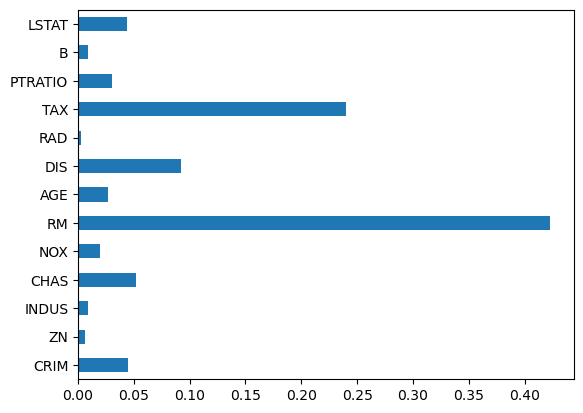

In [138]:
pd.Series(data= model.feature_importances_,index=X_train.columns).plot(kind='barh')